In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

In [2]:
test_phantom = phantom.Phantom(source_path = None,
            voxel_dims = (0.5e-3,0.5e-3,0.5e-3),
            matrix_dims = (300,300,300),
            baseline = (1500, 1000),
            seed = 5678,)

blood = tissue.Tissue(name='blood', c=1578, rho=1060, sigma=5.3, scale=0.00001, label=1)
myocardium = tissue.Tissue(name='myocardium', c=1561.3, rho=1081, sigma=30, scale=0.0001, label=2)
fat = tissue.Tissue(name='fat', c=1450, rho=920, sigma=10, scale=0.0001, label=3)

pos = 0.7

test_phantom.add_tissue_sphere((pos,-pos,0), 8, blood)
test_phantom.add_tissue_sphere((pos,0,0), 16, blood)
test_phantom.add_tissue_sphere((pos,pos,0), 32, blood)

test_phantom.add_tissue_sphere((-pos,-pos,0), 16, fat)
test_phantom.add_tissue_sphere((-pos,0,0), 32, fat)
test_phantom.add_tissue_sphere((-pos,pos,0), 8, fat)

test_phantom.add_tissue_sphere((0,-pos,0), 32, myocardium)
test_phantom.add_tissue_sphere((0,0,0), 8, myocardium)
test_phantom.add_tissue_sphere((0,pos,0), 16, myocardium)

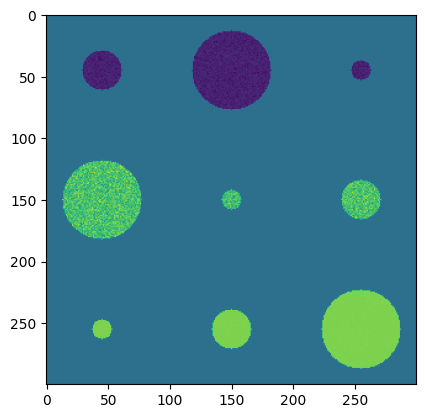

In [3]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [4]:
transducers = [transducer.Planewave(elements = 32, 
                       width = 20e-3,
                       height =  20e-3,
                       sensor_sampling_scheme = 'not_centroid', 
                       sweep = np.pi/3,
                       ray_num = 2, 
                       imaging_ndims = 2,
                       focus_elevation = 20e-3,
                       ) for i in range(2)]

for t in transducers:
    t.make_sensor_coords(test_phantom.baseline[0])

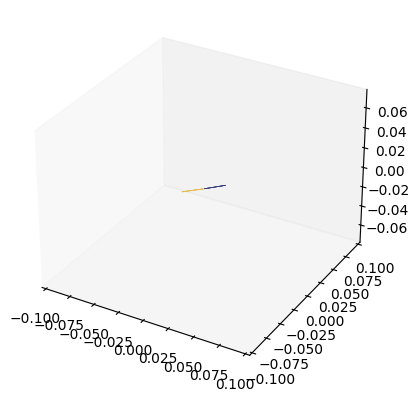

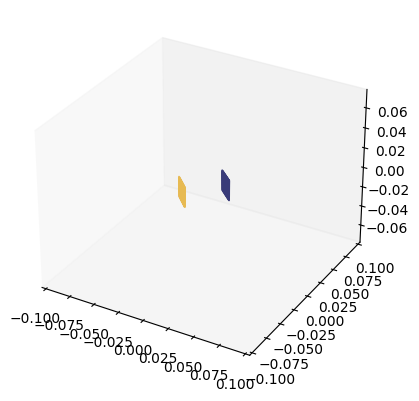

In [5]:
test_transducer_set = transducer_set.TransducerSet(transducers, seed=8888)
test_transducer_set.generate_extrinsics(shape="spherical", extrinsics_kwargs={'r_mean': 20e-3, 'view_std': 0, 'yaw_fraction': 2.5, 'pitch_fraction': 0, 'roll_fraction': 0})
test_transducer_set.plot_transducer_fovs(scale=0.1)
test_transducer_set.plot_transducer_coords(scale=0.1)

In [6]:
test_sensor = sensor.Sensor(transducer_set=test_transducer_set, aperture_type='fdasfjk')

In [7]:
test_sensor.sensor_coords.shape
# test_sensor.sensors_per_el


(3392, 3)

In [8]:
simprops = simulation.SimProperties(
                grid_size   = (60e-3,40e-3,40e-3),
                voxel_size  = (0.1e-3,0.1e-3,0.1e-3),
                PML_size    = (32,8,8),
                PML_alpha   = 2,
                t_end       = 12e-5,           # [s]
                bona        = 6,               # parameter b/a determining degree of nonlinear acoustic effects
                alpha_coeff = 0.5, 	           # [dB/(MHz^y cm)]
                alpha_power = 1.5,
                )

In [9]:
test_experiment = experiment.Experiment(
                 simulation_path = '../experiment_files/update_pw_01',
                 sim_properties  = simprops,
                 phantom         = test_phantom,
                 transducer_set  = test_transducer_set,
                 sensor          = test_sensor,
                 nodes           = 1,
                 results         = None,
                 indices         = None,
                 workers         = 1,
                 )

test_experiment.save()

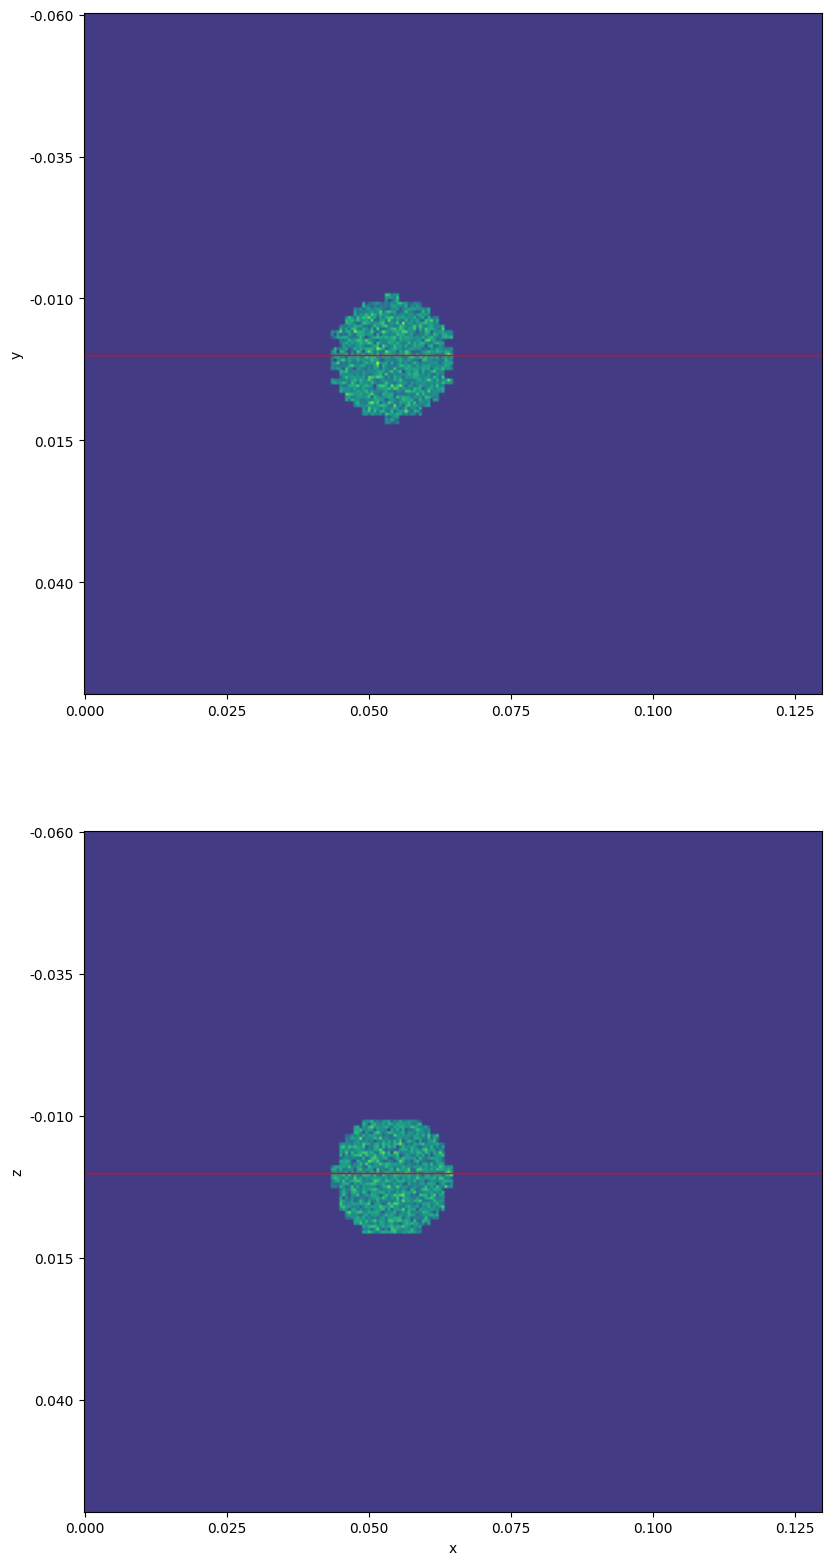

In [10]:
test_experiment.plot_ray_path(2)

In [11]:
test_experiment = experiment.Experiment.load('../experiment_files/update_pw_01')
test_experiment.run(dry=True)

dry run of simulation


  0%|          | 0/2 [00:00<?, ?it/s]

(3392, 3)
sum of sensor_mask(1696.0)
sensor_mask shape (584, 496, 496)
(3392, 3)
sum of sensor_mask(1696.0)
sensor_mask shape (584, 496, 496)
(3392, 3)
sum of sensor_mask(1696.0)
sensor_mask shape (584, 496, 496)
(3392, 3)
sum of sensor_mask(1696.0)
sensor_mask shape (584, 496, 496)


 50%|█████     | 1/2 [00:05<00:05,  5.93s/it]

(3392, 3)
sum of sensor_mask(1696.0)
sensor_mask shape (584, 496, 496)
(3392, 3)
sum of sensor_mask(1696.0)
sensor_mask shape (584, 496, 496)


100%|██████████| 2/2 [00:08<00:00,  4.45s/it]


In [12]:
test_experiment.run()

Found no more simulations to run.


In [13]:
test_experiment.add_results()

In [14]:
test_reconstruction = reconstruction.Compounding(experiment=test_experiment)

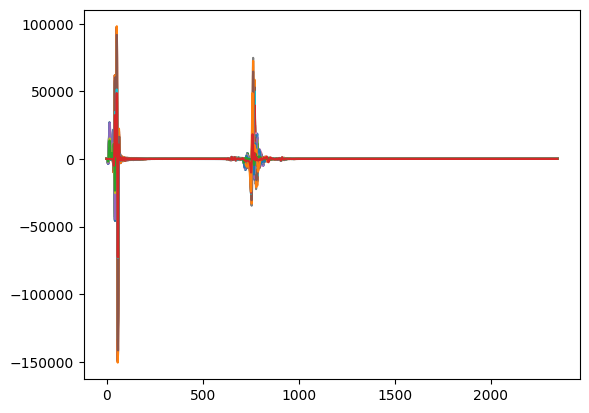

In [20]:
plt.plot(test_reconstruction.results[0][1].T)
plt.show()

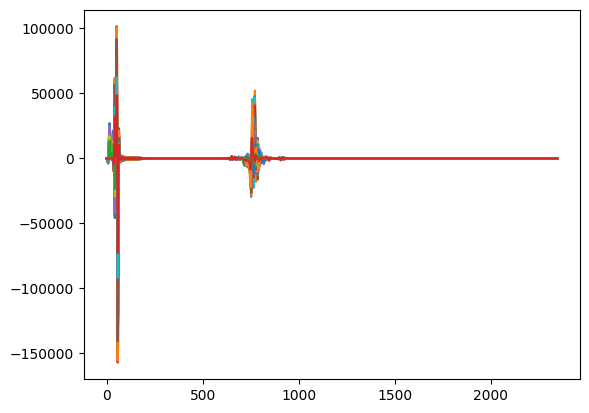

In [21]:
plt.plot(test_reconstruction.results[1][1].T)
plt.show()

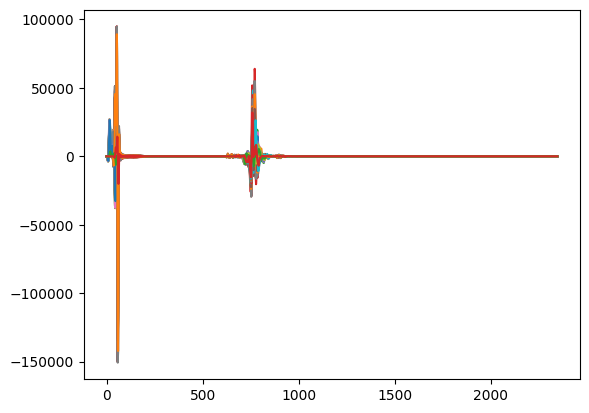

In [22]:
plt.plot(test_reconstruction.results[2][1].T)
plt.show()

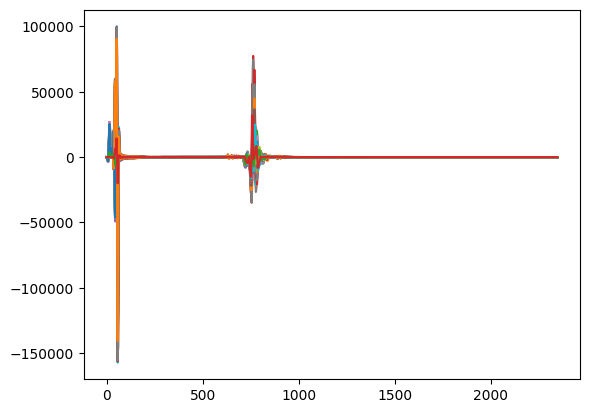

In [23]:
plt.plot(test_reconstruction.results[3][1].T)
plt.show()

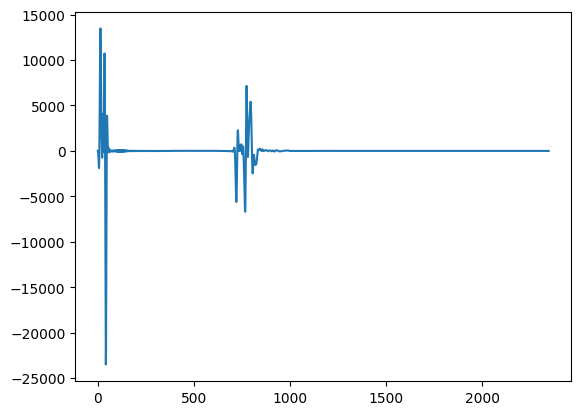

In [38]:
plt.plot(test_reconstruction.results[0][1][0].T)
plt.show()

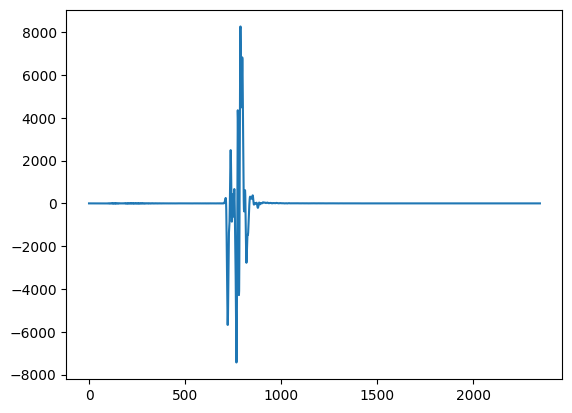

In [42]:
plt.plot(test_reconstruction.results[0][1][4].T)
plt.show()